# Problem Statement

The purpose of this project is to predict price of diamond based on certain parameters and to investigate which parameters are most important to achieve the best results from the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Suppress Warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
dd= pd.read_csv('diamonds.csv')

In [4]:
dd.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
dd.tail()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [6]:
dd.size

593340

In [7]:
dd.shape

(53940, 11)

In [8]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   price    53940 non-null  int64  
 8   x        53940 non-null  float64
 9   y        53940 non-null  float64
 10  z        53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


### Feature description:

* price price in US dollars ($326--$18,823)This is the target column containing tags for the features. 

#### The 4 Cs of Diamonds:-

* carat (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs. 

* cut (Fair, Good, Very Good, Premium, Ideal) In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.  

* color, from J (worst) to D (best) The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.  

* clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.  

* Dimensions

In [9]:
dd.describe()

,id,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
dd.drop(['id'],axis = 1,inplace = True)

### univariate analysis

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

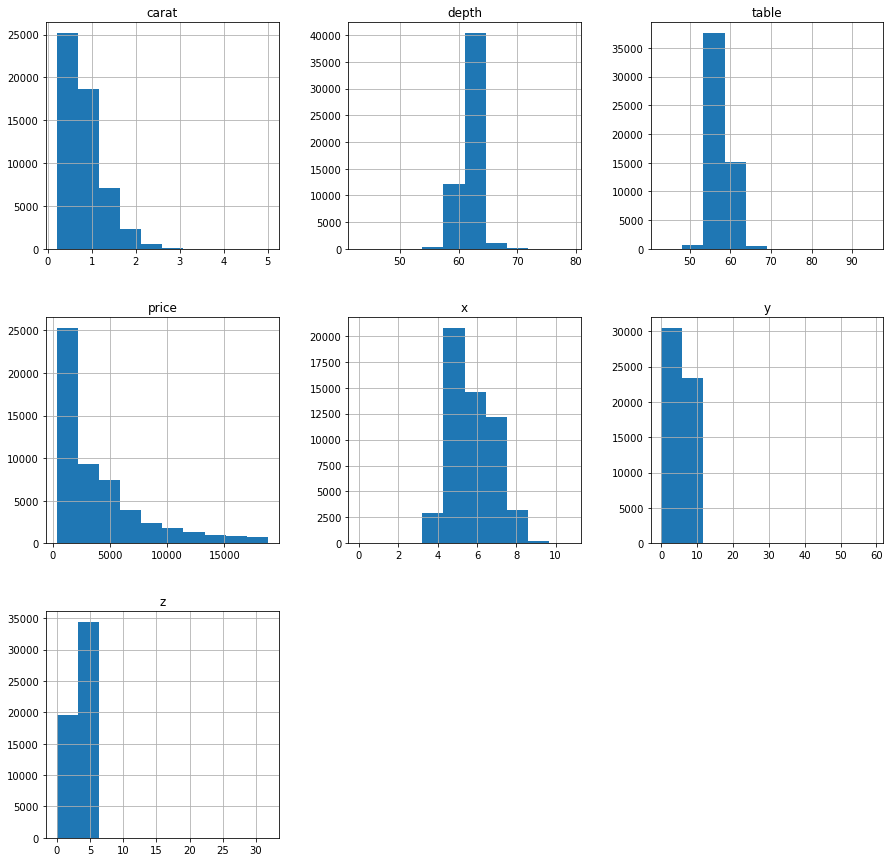

In [11]:
dd.hist(figsize = (15,15))

<AxesSubplot:xlabel='depth', ylabel='Density'>

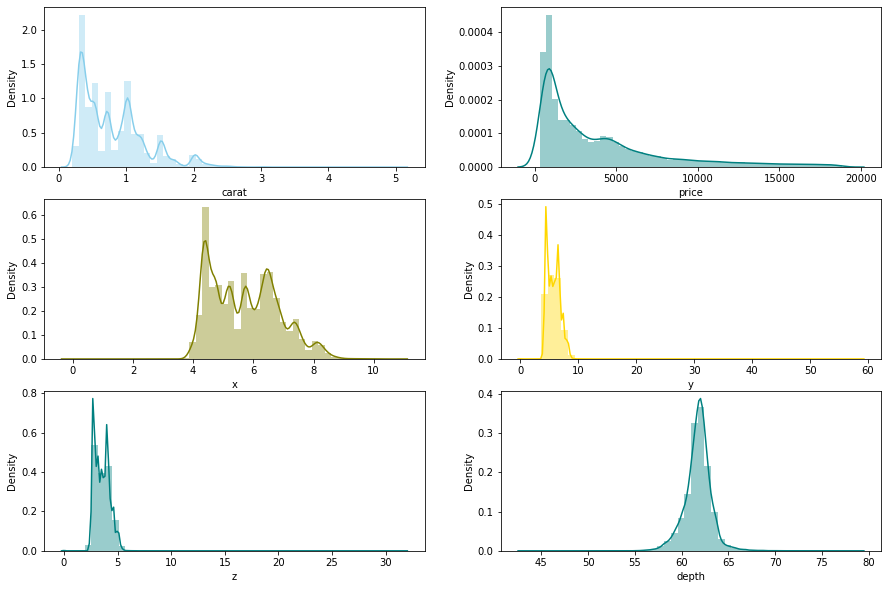

In [12]:
f, axes = plt.subplots(3,2, figsize=(15, 10))
sns.distplot(dd['carat'], color="skyblue", ax=axes[0,0])
sns.distplot(dd['price'], color="teal", ax=axes[0,1])
sns.distplot(dd['x'], color="olive", ax=axes[1,0])
sns.distplot(dd['y'], color="gold", ax=axes[1,1])
sns.distplot(dd['z'], color="teal", ax=axes[2,0])
sns.distplot(dd['depth'], color="teal", ax=axes[2,1])

<AxesSubplot:xlabel='cut', ylabel='count'>

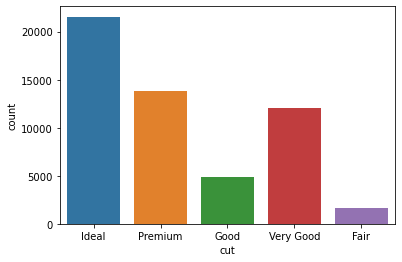

In [13]:
sns.countplot(dd['cut'])

<AxesSubplot:xlabel='color', ylabel='count'>

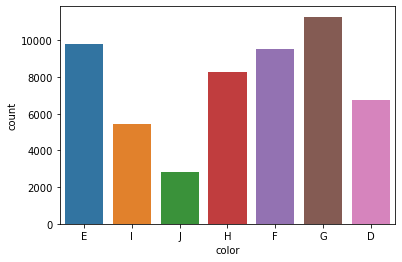

In [14]:
sns.countplot(dd['color'])

<AxesSubplot:xlabel='clarity', ylabel='count'>

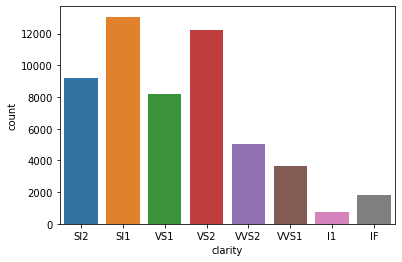

In [15]:
sns.countplot(dd['clarity'])

#### Observations :
    1. Data is multimodal.
    2. Skewness is observed in the dataset . carat and price are rightly skewed.
    3. depth, table,X,Y,Z features are normally distributed.
    4. with the reference of above count plot we have maximum no. of ideal cut diamond and minimum no. of fair cut diamond.

## Bivariate Analysis

In [16]:
cor = dd.corr()

<AxesSubplot:>

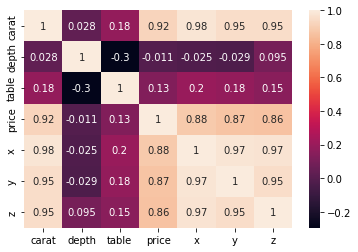

In [17]:
sns.heatmap(cor,annot = True)

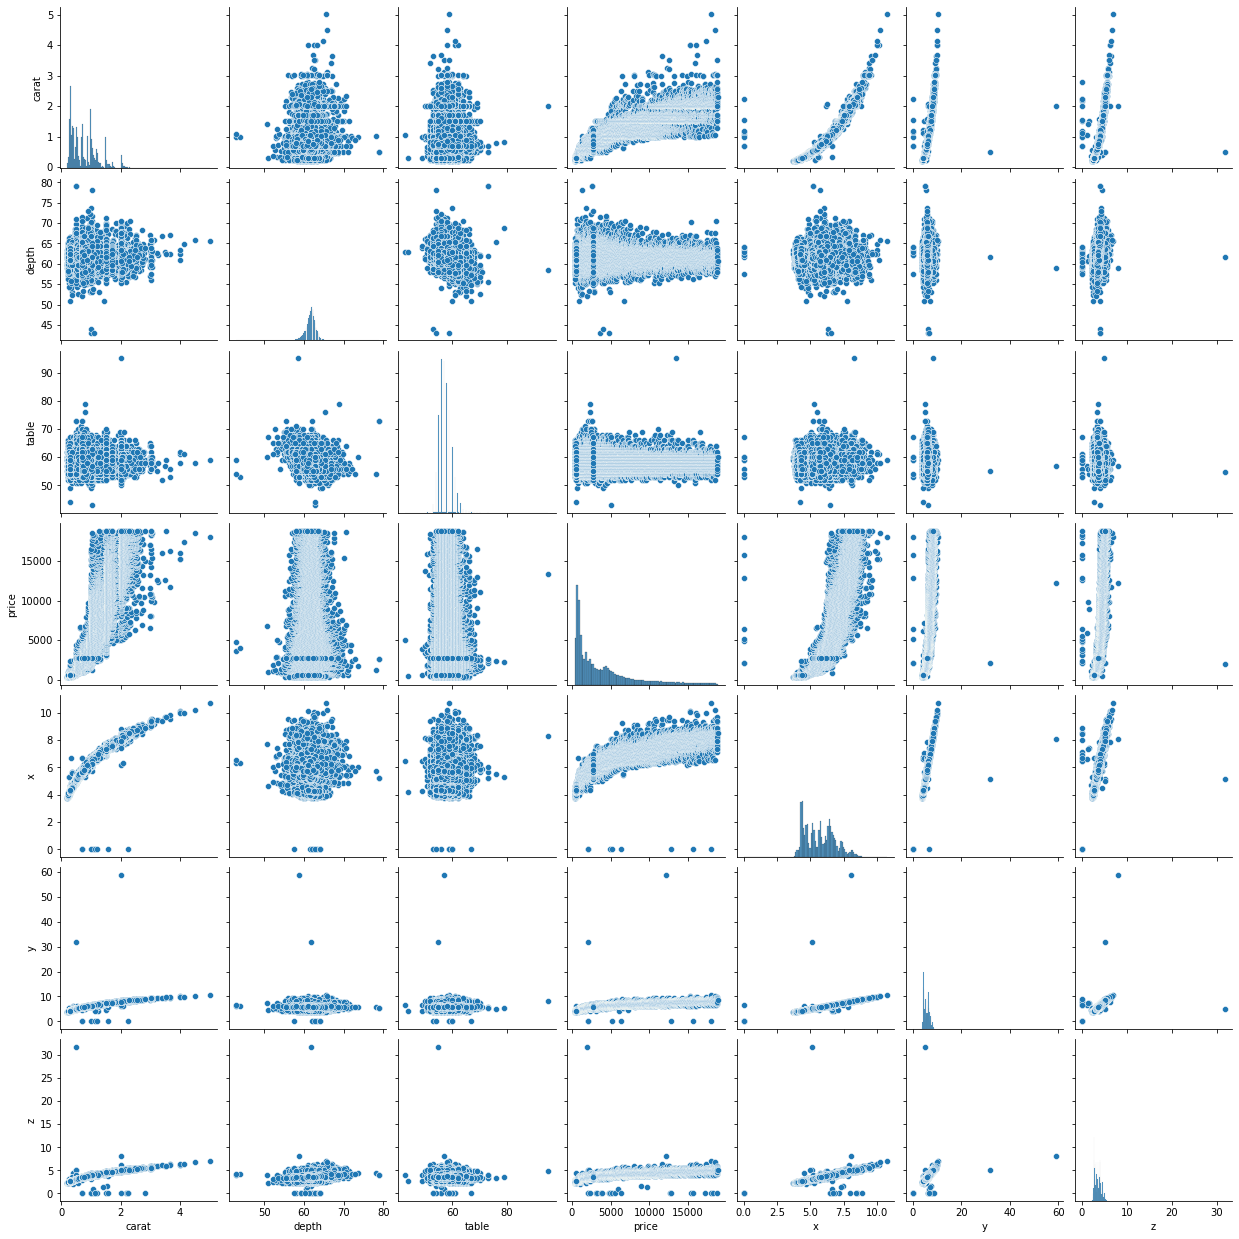

In [18]:
sns.pairplot(dd)

<AxesSubplot:>

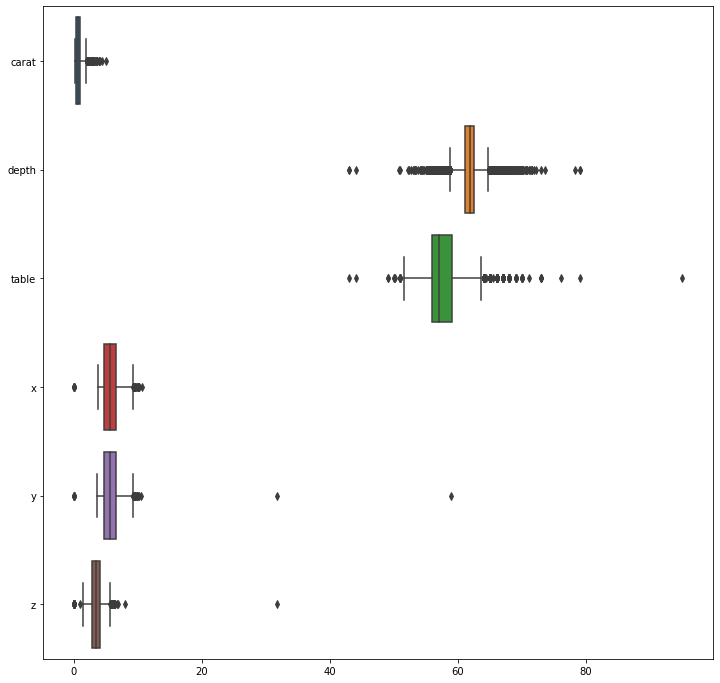

In [19]:
plt.figure(figsize = (12,12))
dd1 = dd.drop(['price'],axis =1)
sns.boxplot(data = dd1,orient = 'h')

#### Observations:
    1. from the heatmap we can conclude that price (target column) has highly positive correlation with X,Y,Z and carat features.
    2. from the box plot we can conclude that all the features have outliers

# Handle missing values 


In [20]:
dd.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# Outliers Handling

In [21]:
# using InterQuartile Range we are handling outliers
for colname,colvals in dd.iteritems():
    if dd[colname].dtype!=object and colname!='price':
        Q1=dd[colname].quantile(q=0.25)
        Q3=dd[colname].quantile(q=0.75)
        IQR=Q3-Q1
        low=Q1-(1.5*IQR)
        up=Q3+(1.5*IQR)
        dd.loc[(dd[colname]<low) | (dd[colname]>up) ,colname]=dd[colname].median()
    else:
           continue

<AxesSubplot:>

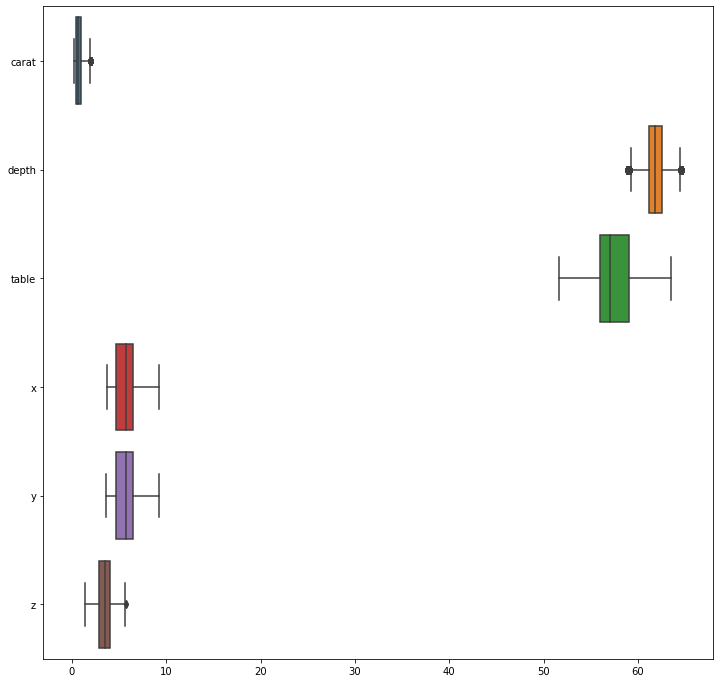

In [22]:
plt.figure(figsize = (12,12))
dd1 = dd.drop(['price'],axis =1)
sns.boxplot(data = dd1,orient = 'h')

 #### Observations:
    depth and table shows max outliers, it may affect to our training dataset.

# Handle Categorical data 

In [23]:
# categorical data
cat_data=dd[dd.select_dtypes(include=[np.object]).columns.to_list()]
cat_data.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [24]:
# numerical data
num_data=dd[dd.select_dtypes(include=[np.number]).columns.to_list()]
num_data.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,61.8,57.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [25]:
# Convert categorical data into numerical

from sklearn.preprocessing import LabelEncoder
cat_data=cat_data.apply(LabelEncoder().fit_transform)
cat_data.head()

,cut,color,clarity
0,2,1,3
1,3,1,2
2,1,1,4
3,3,5,5
4,1,6,3


#### Observations:
1. Label Encoding converts categorical data to numerical data. 
2. our data is ordinal so so we are using label encoder here.


In [26]:
# combining numerical and categorical data

diamond=pd.concat([num_data,cat_data],axis=1)
diamond.head()

,carat,depth,table,price,x,y,z,cut,color,clarity
0,0.23,61.5,55.0,326,3.95,3.98,2.43,2,1,3
1,0.21,59.8,61.0,326,3.89,3.84,2.31,3,1,2
2,0.23,61.8,57.0,327,4.05,4.07,2.31,1,1,4
3,0.29,62.4,58.0,334,4.20,4.23,2.63,3,5,5
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,6,3


# Data is ready to learn from algorithm

## Selecting Features And Target  

In [27]:
X = diamond.drop('price',axis=1)
y= diamond['price']

### Standardization 

In [28]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
X_scaled = scaler.fit_transform(X)

In [29]:
### Summary about Standardization 

### Sampling Data Into Train And Test 

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)


In [31]:
print("Train size",X_train.size)
print("Train shape",X_train.shape)
print("Test size",X_test.size)
print("Test shape",X_test.shape)

Train size 388368
Train shape (43152, 9)
Test size 97092
Test shape (10788, 9)


# Simple Linear Regresssion 

In [32]:
# Selecting Features And Target For Simple Linear Regression 
A = diamond[['carat']]
b= diamond['price']

In [33]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
A_scaled = scaler.fit_transform(A)

In [34]:
from sklearn.model_selection import train_test_split
A_train,A_test,b_train,b_test = train_test_split(A_scaled,b,test_size=0.2)

In [35]:
print("Train size",A_train.size)
print("Train shape",A_train.shape)
print("Test size",A_test.size)
print("Test shape",A_test.shape)

Train size 43152
Train shape (43152, 1)
Test size 10788
Test shape (10788, 1)


In [36]:
print("Test size",A_test.size)
print("Test shape",A_test.shape)
print(b_test.size)
print(b_test.shape)

Test size 10788
Test shape (10788, 1)
10788
(10788,)


In [37]:
# Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(A_train,b_train)
Reg_predict=reg.predict(A_test)


In [38]:
reg.score(A_test,b_test)

0.5754747234496761

In [39]:
reg.score(A_train,b_train)

0.5573924950128453

In [40]:
from sklearn import metrics
import math
R_score= metrics.r2_score(b_test,Reg_predict)
MSE = metrics.mean_squared_error(b_test,Reg_predict)
MAE = metrics.mean_absolute_error(b_test,Reg_predict)
RMSE = math.sqrt(metrics.mean_squared_error(b_test, Reg_predict))

In [41]:
random_re = pd.DataFrame({'Algorithm':['Linear Regression'],'R Square':[R_score],'Mean Squared Error':[MSE],'Mean Absolute Error':[MAE],'Root Mean Squared Error':[RMSE]},index={'1'})
results = random_re[['Algorithm','R Square','Mean Squared Error','Mean Absolute Error','Root Mean Squared Error']]
results

,Algorithm,R Square,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
1,Linear Regression,0.575475,6.650444e+06,1373.692828,2578.845565


# Multi Linear Regression Analysis 

In [42]:
reg = LinearRegression()
reg.fit(X_train, y_train)
Reg_predict_1=reg.predict(X_test)

In [43]:
reg.score(X_train,y_train)

0.8153404695763162

In [44]:
reg.score(X_test,y_test)

0.8142317830521051

In [45]:
R_score_1= metrics.r2_score(y_test,Reg_predict_1)
MSE_1 = metrics.mean_squared_error(y_test,Reg_predict_1)
MAE_1 = metrics.mean_absolute_error(y_test,Reg_predict_1)
RMSE_1= math.sqrt(metrics.mean_squared_error(y_test,Reg_predict_1))

In [46]:
random_1 = pd.DataFrame({'Algorithm':['Multi Linear Regression'],'R Square':[R_score_1],'Mean Squared Error':[MSE_1],'Mean Absolute Error':[MAE_1],'Root Mean Squared Error':[RMSE_1]},index={'2'})
results_1 = pd.concat([results,random_1])
results_1 = results_1[['Algorithm','R Square','Mean Squared Error','Mean Absolute Error','Root Mean Squared Error']]
results_1

,Algorithm,R Square,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
1,Linear Regression,0.575475,6.650444e+06,1373.692828,2578.845565
2,Multi Linear Regression,0.814232,2.953124e+06,1304.562520,1718.465646


# As I see my data is not overfitting so I dont need of cost fuctions but still for practising purpose I used loss or cost functions.

## Using Lasso (L1 Regularized) Regression Model

In [47]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso()
lasso_reg.fit(X_train,y_train)

Lasso()

In [48]:
lasso_reg.score(X_train,y_train)

0.8153380674622224

In [49]:
lasso_reg.score(X_test,y_test)

0.8142315719758566

## Using Ridge (L2 Regularized) Regression Model

In [50]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [51]:
ridge_reg.score(X_train,y_train)

0.8152968319800737

In [52]:
ridge_reg.score(X_test,y_test)

0.8139423247240689

**We see that Lasso and Ridge Regularizations prove to be beneficial when our Simple Linear Regression Model overfits. These results may not be that contrast but significant in most cases.Also that L1 & L2 Regularizations are used in Neural Networks too**

# Decision Tree Regression Analysis

In [53]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion = 'squared_error',random_state = 42,max_depth = 8)
dtr = dtr.fit(X_train,y_train)

In [54]:
y_predict = dtr.predict(X_test)

In [55]:
y_pred_tr = dtr.predict(X_train)
print("Decision tree training R2 Score",metrics.r2_score(y_train,y_pred_tr))

Decision tree training R2 Score 0.9672287284333796


In [56]:
dtr.score(X_train,y_train)

0.9672287284333796

In [57]:
R_score_1= metrics.r2_score(y_test,y_predict)
MSE_1 = metrics.mean_squared_error(y_test,y_predict)
MAE_1 = metrics.mean_absolute_error(y_test,y_predict)
RMSE_1= math.sqrt(metrics.mean_squared_error(y_test,y_predict))

In [58]:
random_2 = pd.DataFrame({'Algorithm':['Decission Tress Regressor'],'R Square':[R_score_1],'Mean Squared Error':[MSE_1],'Mean Absolute Error':[MAE_1],'Root Mean Squared Error':[RMSE_1]},index={'3'})
results_2 = pd.concat([results,random_1,random_2])
results_2 = results_2[['Algorithm','R Square','Mean Squared Error','Mean Absolute Error','Root Mean Squared Error']]
results_2

,Algorithm,R Square,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
1,Linear Regression,0.575475,6.650444e+06,1373.692828,2578.845565
2,Multi Linear Regression,0.814232,2.953124e+06,1304.562520,1718.465646
3,Decission Tress Regressor,0.961923,6.052989e+05,412.722626,778.009561


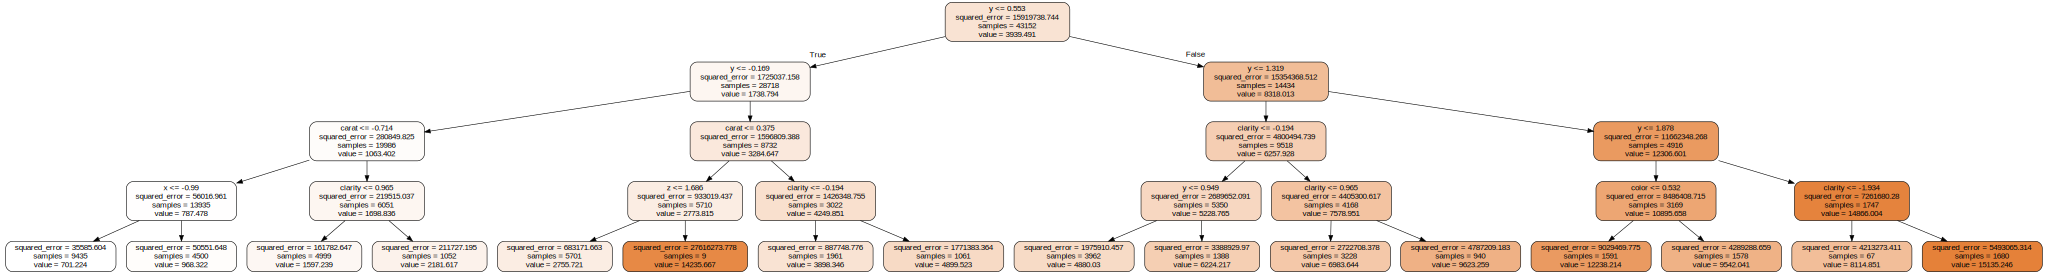

In [59]:
#Visualization of the decision graph :
from sklearn import tree
dtree = tree.DecisionTreeRegressor(criterion='squared_error',max_depth = 4, random_state=42)
dtree.fit(X_train, y_train)
import graphviz
from sklearn import tree
feature_names = X.columns

dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,feature_names=feature_names)
graph = graphviz.Source(dot_data)  
graph

# Random Forest Regressor Analysis

In [60]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 500,random_state = 42,max_depth = 10,n_jobs = -1)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=500, n_jobs=-1,
                      random_state=42)

In [61]:
y_pred_tr = model.predict(X_train)
print("Random forest Regressortraining R2 Score",metrics.r2_score(y_train,y_pred_tr))

Random forest Regressortraining R2 Score 0.9835150709652467


In [62]:
y_predict_3 = model.predict(X_test)

In [63]:
R_score_1= metrics.r2_score(y_test,y_predict_3)
MSE_1 = metrics.mean_squared_error(y_test,y_predict_3)
MAE_1 = metrics.mean_absolute_error(y_test,y_predict_3)
RMSE_1= math.sqrt(metrics.mean_squared_error(y_test,y_predict_3))

In [64]:
random_3 = pd.DataFrame({'Algorithm':['Random Forest Regressor'],'R Square':[R_score_1],'Mean Squared Error':[MSE_1],'Mean Absolute Error':[MAE_1],'Root Mean Squared Error':[RMSE_1]},index={'4'})
results_3 = pd.concat([results,random_1,random_2,random_3])
results_3 = results_3[['Algorithm','R Square','Mean Squared Error','Mean Absolute Error','Root Mean Squared Error']]
results_3

,Algorithm,R Square,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
1,Linear Regression,0.575475,6.650444e+06,1373.692828,2578.845565
2,Multi Linear Regression,0.814232,2.953124e+06,1304.562520,1718.465646
3,Decission Tress Regressor,0.961923,6.052989e+05,412.722626,778.009561
4,Random Forest Regressor,0.977459,3.583237e+05,310.146763,598.601477


# K-Neighbors Regressor Analysis  

In [65]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [66]:
neigh.score(X_train,y_train)

0.9853905045396133

In [67]:
y_predict_4 = neigh.predict(X_test)

In [68]:
R_score_1= metrics.r2_score(y_test,y_predict_4)
MSE_1 = metrics.mean_squared_error(y_test,y_predict_4)
MAE_1 = metrics.mean_absolute_error(y_test,y_predict_4)
RMSE_1= math.sqrt(metrics.mean_squared_error(y_test,y_predict_4))

In [69]:
random_4 = pd.DataFrame({'Algorithm':['K-Neighbors Regressor'],'R Square':[R_score_1],'Mean Squared Error':[MSE_1],'Mean Absolute Error':[MAE_1],'Root Mean Squared Error':[RMSE_1]},index={'5'})
results_4 = pd.concat([results,random_1,random_2,random_3,random_4])
results_4 = results_4[['Algorithm','R Square','Mean Squared Error','Mean Absolute Error','Root Mean Squared Error']]
results_4

,Algorithm,R Square,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
1,Linear Regression,0.575475,6.650444e+06,1373.692828,2578.845565
2,Multi Linear Regression,0.814232,2.953124e+06,1304.562520,1718.465646
3,Decission Tress Regressor,0.961923,6.052989e+05,412.722626,778.009561
4,Random Forest Regressor,0.977459,3.583237e+05,310.146763,598.601477
5,K-Neighbors Regressor,0.946995,8.426037e+05,439.758945,917.934465


In [70]:
# pip install mlxtend 

# AdaBoost Regressor

In [71]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(random_state=42)

adaboost.fit(X_train,y_train)

AdaBoostRegressor(random_state=42)

In [72]:
y_train_ada = adaboost.predict(X_train)
print("Adaboost Regressor training R2 Score",metrics.r2_score(y_train,y_train_ada))
y_ada_predict = adaboost.predict(X_test)

Adaboost Regressor training R2 Score 0.8029174730702582


In [73]:
R_score_1= metrics.r2_score(y_test,y_ada_predict)
MSE_1 = metrics.mean_squared_error(y_test,y_ada_predict)
MAE_1 = metrics.mean_absolute_error(y_test,y_ada_predict)
RMSE_1= math.sqrt(metrics.mean_squared_error(y_test,y_ada_predict))

In [74]:
random_5 = pd.DataFrame({'Algorithm':['ADA-Boost Regressor'],'R Square':[R_score_1],'Mean Squared Error':[MSE_1],'Mean Absolute Error':[MAE_1],'Root Mean Squared Error':[RMSE_1]},index={'6'})
results_5 = pd.concat([results,random_1,random_2,random_3,random_4,random_5])
results_5 = results_5[['Algorithm','R Square','Mean Squared Error','Mean Absolute Error','Root Mean Squared Error']]
results_5

,Algorithm,R Square,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
1,Linear Regression,0.575475,6.650444e+06,1373.692828,2578.845565
2,Multi Linear Regression,0.814232,2.953124e+06,1304.562520,1718.465646
3,Decission Tress Regressor,0.961923,6.052989e+05,412.722626,778.009561
4,Random Forest Regressor,0.977459,3.583237e+05,310.146763,598.601477
5,K-Neighbors Regressor,0.946995,8.426037e+05,439.758945,917.934465
6,ADA-Boost Regressor,0.799171,3.192548e+06,1240.001556,1786.770137


# Gradient Boosting Regressor Analysis

In [75]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(random_state=42)
gbrt.fit(X_train,y_train)

y_gbrt_predict_tr = gbrt.predict(X_train)
R_score_1= metrics.r2_score(y_train,y_gbrt_predict_tr)
print("Gradient Boosting Regressor:",R_score_1)


Gradient Boosting Regressor: 0.9709001352713634


In [76]:
y_gbrt_predict = gbrt.predict(X_test)
R_score_1= metrics.r2_score(y_test,y_gbrt_predict)
MSE_1 = metrics.mean_squared_error(y_test,y_gbrt_predict)
MAE_1 = metrics.mean_absolute_error(y_test,y_gbrt_predict)
RMSE_1= math.sqrt(metrics.mean_squared_error(y_test,y_gbrt_predict))
random_6 = pd.DataFrame({'Algorithm':['Gradient Boosting Regressor'],'R Square':[R_score_1],'Mean Squared Error':[MSE_1],'Mean Absolute Error':[MAE_1],'Root Mean Squared Error':[RMSE_1]},index={'7'})
results_6 = pd.concat([results,random_1,random_2,random_3,random_4,random_5,random_6])
results_6 = results_6[['Algorithm','R Square','Mean Squared Error','Mean Absolute Error','Root Mean Squared Error']]
results_6

,Algorithm,R Square,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
1,Linear Regression,0.575475,6.650444e+06,1373.692828,2578.845565
2,Multi Linear Regression,0.814232,2.953124e+06,1304.562520,1718.465646
3,Decission Tress Regressor,0.961923,6.052989e+05,412.722626,778.009561
4,Random Forest Regressor,0.977459,3.583237e+05,310.146763,598.601477
5,K-Neighbors Regressor,0.946995,8.426037e+05,439.758945,917.934465
6,ADA-Boost Regressor,0.799171,3.192548e+06,1240.001556,1786.770137
7,Gradient Boosting Regressor,0.970451,4.697274e+05,372.271024,685.366587


# Xtreme Gradient Boost Regression Analysis

In [77]:
from xgboost.sklearn import XGBRegressor

xgb_reg = XGBRegressor(random_state=42)

xgb_reg.fit(X_train,y_train)

y_xgbrt_predict_tr = xgb_reg.predict(X_train)
R_score_1= metrics.r2_score(y_train,y_xgbrt_predict_tr)
print("Gradient Boosting Regressor Training Score:",R_score_1)


Gradient Boosting Regressor Training Score: 0.9905507951757226


In [78]:
y_xgb_predict = xgb_reg.predict(X_test)
R_score_1= metrics.r2_score(y_test,y_xgb_predict)
MSE_1 = metrics.mean_squared_error(y_test,y_xgb_predict)
MAE_1 = metrics.mean_absolute_error(y_test,y_xgb_predict)
RMSE_1= math.sqrt(metrics.mean_squared_error(y_test,y_xgb_predict))
random_7 = pd.DataFrame({'Algorithm':['XGBoost Regressor'],'R Square':[R_score_1],'Mean Squared Error':[MSE_1],'Mean Absolute Error':[MAE_1],'Root Mean Squared Error':[RMSE_1]},index={'8'})
results_7 = pd.concat([results,random_1,random_2,random_3,random_4,random_5,random_6,random_7])
results_7 = results_7[['Algorithm','R Square','Mean Squared Error','Mean Absolute Error','Root Mean Squared Error']]
results_7

,Algorithm,R Square,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
1,Linear Regression,0.575475,6.650444e+06,1373.692828,2578.845565
2,Multi Linear Regression,0.814232,2.953124e+06,1304.562520,1718.465646
3,Decission Tress Regressor,0.961923,6.052989e+05,412.722626,778.009561
4,Random Forest Regressor,0.977459,3.583237e+05,310.146763,598.601477
5,K-Neighbors Regressor,0.946995,8.426037e+05,439.758945,917.934465
6,ADA-Boost Regressor,0.799171,3.192548e+06,1240.001556,1786.770137
7,Gradient Boosting Regressor,0.970451,4.697274e+05,372.271024,685.366587
8,XGBoost Regressor,0.979434,3.269290e+05,283.616128,571.777030


# Support Vector Regression

In [79]:
from sklearn import svm
model = svm.SVR()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
print("SVR Training Score:",metrics.r2_score(y_train,y_train_pred))
y_test_pred = model.predict(X_test)

R_score_1= metrics.r2_score(y_test,y_test_pred)
MSE_1 = metrics.mean_squared_error(y_test,y_test_pred)
MAE_1 = metrics.mean_absolute_error(y_test,y_test_pred)
RMSE_1= math.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

SVR Training Score: 0.474884665132827


In [80]:
random_8 = pd.DataFrame({'Algorithm':['Support Vector Regressor'],'R Square':[R_score_1],'Mean Squared Error':[MSE_1],'Mean Absolute Error':[MAE_1],'Root Mean Squared Error':[RMSE_1]},index={'9'})
results_8 = pd.concat([results,random_1,random_2,random_3,random_4,random_5,random_6,random_7,random_8])
results_8 = results_8[['Algorithm','R Square','Mean Squared Error','Mean Absolute Error','Root Mean Squared Error']]
results_8

,Algorithm,R Square,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
1,Linear Regression,0.575475,6.650444e+06,1373.692828,2578.845565
2,Multi Linear Regression,0.814232,2.953124e+06,1304.562520,1718.465646
3,Decission Tress Regressor,0.961923,6.052989e+05,412.722626,778.009561
4,Random Forest Regressor,0.977459,3.583237e+05,310.146763,598.601477
5,K-Neighbors Regressor,0.946995,8.426037e+05,439.758945,917.934465
6,ADA-Boost Regressor,0.799171,3.192548e+06,1240.001556,1786.770137
7,Gradient Boosting Regressor,0.970451,4.697274e+05,372.271024,685.366587
8,XGBoost Regressor,0.979434,3.269290e+05,283.616128,571.777030
9,Support Vector Regressor,0.474413,8.355162e+06,1389.922658,2890.529732


# Votting Regressor 

In [81]:
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor(criterion = "squared_error", random_state = 42)
random_forest_reg = RandomForestRegressor(random_state = 42)
kneighbour_reg = KNeighborsRegressor(n_neighbors=2)
adaboost_reg = AdaBoostRegressor(random_state=42)
gbr_reg = GradientBoostingRegressor(random_state=42)
xgb_reg = XGBRegressor(random_state=40)
svr = svm.SVR(kernel = 'linear')
from sklearn.ensemble import VotingRegressor
voting_reg = VotingRegressor(estimators=[('LR', linear_reg), ('DTR',decision_tree_reg),('RFR',random_forest_reg),('KNR',kneighbour_reg),('ABR',adaboost_reg),('GBR',gbr_reg ),('XGBR',xgb_reg),('SVR',svr)])

voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('DTR', DecisionTreeRegressor(random_state=42)),
                            ('RFR', RandomForestRegressor(random_state=42)),
                            ('KNR', KNeighborsRegressor(n_neighbors=2)),
                            ('ABR', AdaBoostRegressor(random_state=42)),
                            ('GBR', GradientBoostingRegressor(random_state=42)),
                            ('XGBR',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,...
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_de

In [82]:
for (name, prd) in ('LR', linear_reg),('DTR',decision_tree_reg),('RFR',random_forest_reg),('KNR',kneighbour_reg),('ABR',adaboost_reg),('GBR',gbr_reg ),('XGBR',xgb_reg),('SVR',svr):
    prd.fit(X_train, y_train)

In [83]:
for reg in (linear_reg, decision_tree_reg,random_forest_reg,kneighbour_reg,adaboost_reg,gbr_reg,xgb_reg ,svr,voting_reg):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(reg.__class__.__name__, metrics.r2_score(y_test,y_pred))

LinearRegression 0.8142317830521051
DecisionTreeRegressor 0.9610060146512946
RandomForestRegressor 0.9791257040026629
KNeighborsRegressor 0.9469954616991675
AdaBoostRegressor 0.7991707001968926
GradientBoostingRegressor 0.9704514918425068
XGBRegressor 0.9794343181928468
SVR 0.708685527249685
VotingRegressor 0.9569809632479048


# predicting values from model using same dataset

In [84]:
xgb_reg1 = pd.DataFrame({'Actual value': y_test, 'Predicted value': xgb_reg.predict(X_test)})
xgb_reg1.head(10)

,Actual value,Predicted value
1388,559,587.629517
50052,2201,2400.331055
41645,1238,1217.870728
42377,1304,1347.902466
17244,6901,9527.949219
1608,3011,3778.285645
46398,1765,1832.608032
45493,1679,1824.547607
49385,2102,2253.062500
10460,4789,5876.118164


In [85]:
import numpy as np
l=[(0.24,60.2,56,3.96,4.07,2.43,3,2,1)]
i=np.array(l)
y_pred = xgb_reg.predict(i)
print('predictions for new Data :',y_pred)

predictions for new Data : [16738.787]


# XGB Regressor shows good result with minimum errors